# Predicting Death in COVID-19 Case Surveillance Data
Project mentor: Numair Sani

Abhi Mohnani <amohnan1@jh.edu>, Kavan Bansal <kbansal2@jh.edu>, Jack Yu <jyu108@jh.edu>, Raghav Sambasivan <rsambas1@jh.edu>

https://github.com/kavbansal/ML-Final-Project

# Outline and Deliverables

List the deliverables from your project proposal. For each uncompleted deliverable, please include a sentence or two on why you weren't able to complete it (e.g. "decided to use an existing implementation instead" or "ran out of time"). For each completed deliverable, indicate which section of this notebook covers what you did.

If you spent substantial time on any aspects that weren't deliverables in your proposal, please list those under "Additional Work" and indicate where in the notebook you discuss them.

### Uncompleted Deliverables
1. Use our model on data that is separate from our original CDC dataset and provide accurate predictions on patient death there as well: We started the process of searching for another dataset to work with and found the restricted access dataset with more features, however by the time we were granted approval, we did not have time to use our model on this data and assess the results properly.
2. Identify which input parameters are most relevant in predicting whether or not a patient will die: We have not yet identified exactly which features are most relevant, however we have a small set of features and found it interesting that even this small set can predict death with relatively high accuracy. It seems that age range is almost certainly an important one.


### Completed Deliverables
1. Process data and extract features
: We discuss our dataset pre-processing [in "Dataset" and "Pre-processing" below](#scrollTo=zFq-_D0khnhh&line=10&uniqifier=1).
2. Set up dataset into train, test, validation splits in a way that makes sense and does not unintentionally introduce bias: We discuss balancing our data splits and training our Perceptron baseline [in "Baselines" below](#scrollTo=oMyqHUa0jUw7&line=5&uniqifier=1).
3. Develop a model with over 50% accuracy on the test set, Develop a model with over 75% accuracy on the test set, and Be able to train a model that produces an accuracy above 90% that can be somewhat explained by our method decisions: We successfully trained 3 models that have accuracies over 90%. Since the number of features is relatively low, explainability is a bit easier, however this is something we keep in mind as we start to work with new datasets.
4. Develop a model with an F-1 Score above .75: In the end, all 3 models had F-1 scores over 0.90, which we were happy with.
5. Analyze our model to better understand the importance of each input parameter: We were able to start doing this but plan to keep working on understanding the importance of each feature as we work with new features.



### Additional Deliverables
1. We did not originally plan to train a Perceptron on this data, but decided to add that in as an important baseline, in addition to the Logistic Regression, to more accurately assess our progress.
2. We also spent some time looking at our data and results more comprehensively (see graphs in results section) to determine how our model was performing and could potentially perform better.

# Preliminaries

## What problem were you trying to solve or understand?

Through our project, we attempted to address the issue of the COVID-19 pandemic and the potentially deadly impact of COVID. Millions of Americans have been infected with COVID-19 and over 1.5 million people have died of the disease globally, however the exact drivers that cause a patient to be more likely to die than another patient remain unclear. Leveraging data to better predict whether or not a patient is likely to die of the disease can help healthcare workers better address deficiencies and focus their resources where they are needed most and potentially save lives that might have otherwise been lost.

Because this is a supervised-learning and classification task, it is similar to other tasks we have explored in class, and we decided to apply class concepts like logistic regression, perceptrons, and random forests to the large CDC dataset to solve this problem.

In terms of ethics, this problem is similar to the problem of autonomous driving that we discussed in class, since there are human lives at stake. If done correctly, addressing this problem through ML can save lives, however caution must be taken. Patient privacy is one of the biggest ethical concerns with this task, and the dataset we used contained anonymized data to address this concern. One thing that makes this problem very unique is that the data is all very recent and unfortunately, continues to grow as confirmed cases of COVID-19 increase. While this makes for a large dataset of very current data, much of the data is incomplete, so that was one factor we took into consideration and will discuss in the dataset preprocessing section.

## Dataset(s)

Describe the dataset(s) you used.

We used publicly- available data provided by the CDC that gave surveillance data on COVID-19 patients. The original data set had 11 fields, CDC report data, Positive specimen date, first symptom date, lab confirmed or probable case of COVID, sex, age group, race/ethnicity, hospitalized, ICU, underlying medical conditions, and death. Since our project was to predict death in a given patient that went under COVID-19, we used the death field as our label.

How were they collected?

Collection of the data was relatively straightforward. We went to the following link to get a CSV download of the data set (data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf). From there, we simply mounted our drive to have the CSV file and read in the data into a pandas dataframe to begin our preprocessing.

Why did you choose them?

The primary reason we chose this dataset over many other COVID-19 datasets was that our problem was relatively unique from most COVID projects in that we are trying to predict death from patients that are guaranteed to have COVID. Many of the ML applications to COVID currently are in trying to discover whether a patient will actually test positive for COVID given certain factors, which in hand meant that most datasets we found didn't have a death field. Although we're sure there are likely otherdatasets out there with COVID death data, the fact this was provided by the CDC and it was quite easy to export made it an ideal choice for us.

How many examples in each?

Prior to preprocessesing, there were 2.8 million examples, where each example represented a patient that had COVID-19. However, after the multitude of preprocessing steps we took, this reduced to around 54,000 examples. It is interesting to note that since downloading this dataset for our purposes, the size of the public CDC dataset had almost quadrupled to around 8.4 million examples now, thus showing the constantly changing aspect of this problem.


In [ ]:
# Load your data and print 2-3 examples
import pandas as pd
from google.colab import drive
drive.mount('/content/drive')
dforiginal = pd.read_csv(r'/content/drive/MyDrive/ML Final Project/COVID-19_Case_Surveillance_Public_Use_Data.csv')
print(dforiginal)

Mounted at /content/drive


/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (1) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


        cdc_report_dt pos_spec_dt    onset_dt  ...   icu_yn death_yn medcond_yn
0          2020/06/30         NaN         NaN  ...  Unknown       No    Unknown
1          2020/06/30         NaN         NaN  ...  Unknown       No    Unknown
2          2020/07/05         NaN         NaN  ...  Missing  Missing    Missing
3          2020/06/10         NaN  2020/03/27  ...  Unknown       No    Unknown
4          2020/07/13         NaN  2020/04/20  ...  Unknown       No    Unknown
...               ...         ...         ...  ...      ...      ...        ...
5760061    2020/08/05  2020/06/11         NaN  ...  Missing  Missing        Yes
5760062    2020/06/15  2020/06/11  2020/06/16  ...  Missing  Missing        Yes
5760063    2020/06/11  2020/06/11  2020/06/11  ...       No      Yes        Yes
5760064    2020/06/14  2020/06/11         NaN  ...  Missing  Missing        Yes
5760065    2020/06/11  2020/06/11         NaN  ...  Missing  Missing    Missing

[5760066 rows x 11 columns]


In [ ]:
import numpy as np

df = dforiginal
#Preprocess Features
df = df.drop(['cdc_report_dt', 'pos_spec_dt', 'current_status'], axis=1)
df.loc[df['sex'] == 'Male', 'sex'] = 0
df.loc[df['sex'] == 'Female', 'sex'] = 1
df.loc[df['sex'] == 'Other', 'sex'] = 2
df.loc[df['sex'] == 'Unknown', 'sex'] = np.nan
df.loc[df['sex'] == 'Missing', 'sex'] = np.nan
df.loc[df['sex'].isnull(), 'sex'] = np.nan
df.loc[df['onset_dt'].isnull(), 'onset_dt'] = 0
df.loc[df['onset_dt'] != 0, 'onset_dt'] = 1
df['onset_dt'] = df['onset_dt'].astype(float)
df['sex'] = df['sex'].astype(float)

df.loc[df['age_group'] == '0 - 9 Years', 'age_group'] = 0
df.loc[df['age_group'] == '10 - 19 Years', 'age_group'] = 1
df.loc[df['age_group'] == '20 - 29 Years', 'age_group'] = 2
df.loc[df['age_group'] == '30 - 39 Years', 'age_group'] = 3
df.loc[df['age_group'] == '40 - 49 Years', 'age_group'] = 4
df.loc[df['age_group'] == '50 - 59 Years', 'age_group'] = 5
df.loc[df['age_group'] == '60 - 69 Years', 'age_group'] = 6
df.loc[df['age_group'] == '70 - 79 Years', 'age_group'] = 7
df.loc[df['age_group'] == '80+ Years', 'age_group'] = 8
df.loc[df['age_group'] == 'Unknown', 'age_group'] = np.nan
df.loc[df['age_group'].isnull(), 'age_group'] = np.nan
df['age_group'] = df['age_group'].astype(float)

df.loc[df['Race and ethnicity (combined)'] == 'Unknown', 'Race and ethnicity (combined)'] = np.nan
df.loc[df['Race and ethnicity (combined)'].isnull(), 'Race and ethnicity (combined)'] = np.nan
df.loc[df['Race and ethnicity (combined)'] == 'Asian, Non-Hispanic', 'Race and ethnicity (combined)'] = 0
df.loc[df['Race and ethnicity (combined)'] == 'Multiple/Other, Non-Hispanic', 'Race and ethnicity (combined)'] = 1
df.loc[df['Race and ethnicity (combined)'] == 'Black, Non-Hispanic', 'Race and ethnicity (combined)'] = 2
df.loc[df['Race and ethnicity (combined)'] == 'Hispanic/Latino', 'Race and ethnicity (combined)'] = 3
df.loc[df['Race and ethnicity (combined)'] == 'American Indian/Alaska Native, Non-Hispanic', 'Race and ethnicity (combined)'] = 4
df.loc[df['Race and ethnicity (combined)'] == 'Native Hawaiian/Other Pacific Islander, Non-Hispanic', 'Race and ethnicity (combined)'] = 5
df.loc[df['Race and ethnicity (combined)'] == 'White, Non-Hispanic', 'Race and ethnicity (combined)'] = 6
df['Race and ethnicity (combined)'] = df['Race and ethnicity (combined)'].astype(float)

df.loc[df['hosp_yn'] == 'Unknown', 'hosp_yn'] = np.nan
df.loc[df['hosp_yn'] == 'Missing', 'hosp_yn'] = np.nan
df.loc[df['hosp_yn'] == 'Yes', 'hosp_yn'] = 1
df.loc[df['hosp_yn'] == 'No', 'hosp_yn'] = 0
df['hosp_yn'] = df['hosp_yn'].astype(float)

df.loc[df['icu_yn'] == 'Unknown', 'icu_yn'] = np.nan
df.loc[df['icu_yn'] == 'Missing', 'icu_yn'] = np.nan
df.loc[df['icu_yn'] == 'Yes', 'icu_yn'] = 1
df.loc[df['icu_yn'] == 'No', 'icu_yn'] = 0
df['icu_yn'] = df['icu_yn'].astype(float)

df.loc[df['medcond_yn'] == 'Unknown', 'medcond_yn'] = np.nan
df.loc[df['medcond_yn'] == 'Missing', 'medcond_yn'] = np.nan
df.loc[df['medcond_yn'] == 'Yes', 'medcond_yn'] = 1
df.loc[df['medcond_yn'] == 'No', 'medcond_yn'] = 0
df['medcond_yn'] = df['medcond_yn'].astype(float)

df.loc[df['death_yn'] == 'Unknown', 'death_yn'] = -1
df.loc[df['death_yn'] == 'Missing', 'death_yn'] = -1
df.loc[df['death_yn'] == 'Yes', 'death_yn'] = 1
df.loc[df['death_yn'] == 'No', 'death_yn'] = 0
df['death_yn'] = df['death_yn'].astype(int)

df = df[df.death_yn != -1]
print(df)

         onset_dt  sex  age_group  ...  icu_yn  death_yn  medcond_yn
0             0.0  2.0        0.0  ...     NaN         0         NaN
1             0.0  2.0        0.0  ...     NaN         0         NaN
3             1.0  2.0        0.0  ...     NaN         0         NaN
4             1.0  2.0        0.0  ...     NaN         0         NaN
5             1.0  2.0        0.0  ...     NaN         0         NaN
...           ...  ...        ...  ...     ...       ...         ...
5760054       1.0  1.0        7.0  ...     NaN         0         0.0
5760057       1.0  1.0        7.0  ...     0.0         0         NaN
5760058       0.0  1.0        7.0  ...     NaN         0         1.0
5760060       1.0  1.0        7.0  ...     NaN         0         NaN
5760063       1.0  1.0        7.0  ...     0.0         1         1.0

[2821210 rows x 8 columns]


## Pre-processing

What features did you use or choose not to use? Why?

Out of the original 11 fields we were provided, we chose to eliminate two of the date fields (date of initial case report to CDC and date of first positive specimen collection). We removed them because we didn't think that they had any relevance to a prediction of whether or not the patient would die. Since this dataset just happened to have a field for death (wasn't specifically made for predicting death), we thought that it wasn't relevant to our problem. We converted the final date field (date of first symptoms) into a boolean of whether or not the patient had any symptoms at all. We also removed a field categorizing a patient either into a lab-confirmed case of COVID or a probable case of COVID. We were only interested in patients that were confirmed victims of COVID-19, which greatly reduced the size of our dataset. The rest of the features mentiioned earlier we chose to keep, but converted them into quantitative (0, 1, etc.) rather than categorical label. 

If you have categorical labels, were your datasets class-balanced?

We converted all of our categorical labels into quantitative labels, and their mean/distribution can be viewed in our summary statistics in our code.

How did you deal with missing data? What about outliers?

Since we had so few features, and our original hypothesis made us believe that many of these features would have a servere impact on whether the patient would die or not (plus we had millions of examples to start off with), we chose to eliminate any rows of our dataset that had any missing data at all. This along with balancing our data for our death feature led to around 54,000 remaining rows.

What approach(es) did you use to pre-process your data? Why?

Like mentioned above, the first thing we did was to drop all rows of our dataframe that had any missing data for at least one feature. In addition, after ruunning our baseline model, we noticed our F1 score was still very low (~.3), so we found that our dataset was heavily skewed to patients that did not die of covid. In fact, only 5% of our dataset had patients that died. For this reason, we chose to randomly sample an equal amount of patients that did not die from COVID to  use in our training dataset so that our model was not biased towards patients that didn't die.

Are your features continuous or categorical? How do you treat these features differently?

All of our features are discrete categorical labels (not continuous). Since they were all discrete labels (although some were binary and some were multi-class like age group and race), we treated all features the same.

In [ ]:
# For those same examples above, what do they look like after being pre-processed?
# Visualize the distribution of your data before and after pre-processing.
import random

print("Before balancing")
print(df.describe(include='all').transpose())

df = df.dropna(axis=0, how='any')
#print(df)
x = df['death_yn'].value_counts(ascending=True)
print(x)
non_death_rows = df.index[df['death_yn'] == 0].tolist()
number_to_drop = x[0] - x[1]
print(number_to_drop)
rows_to_drop = random.sample(non_death_rows, number_to_drop)
df = df.drop(rows_to_drop, axis=0)
print(df)
display(df)

print("After balancing")
print(pd.DataFrame(df).describe(include='all').transpose())





Before balancing
                                   count      mean       std  ...  50%  75%  max
onset_dt                       2821210.0  0.733023  0.442380  ...  1.0  1.0  1.0
sex                            2806945.0  0.526164  0.499382  ...  1.0  1.0  2.0
age_group                      2819242.0  3.813522  2.098611  ...  4.0  5.0  8.0
Race and ethnicity (combined)  1957589.0  4.117912  1.950239  ...  3.0  6.0  6.0
hosp_yn                        2308169.0  0.135911  0.342694  ...  0.0  0.0  1.0
icu_yn                          547028.0  0.077115  0.266774  ...  0.0  0.0  1.0
death_yn                       2821210.0  0.056095  0.230105  ...  0.0  0.0  1.0
medcond_yn                      864003.0  0.517664  0.499688  ...  1.0  1.0  1.0

[8 rows x 8 columns]
1     27206
0    315059
Name: death_yn, dtype: int64
287853
         onset_dt  sex  age_group  ...  icu_yn  death_yn  medcond_yn
26540         1.0  0.0        0.0  ...     0.0         0         1.0
26935         1.0  0.0        0.0 

,onset_dt,sex,age_group,Race and ethnicity (combined),hosp_yn,icu_yn,death_yn,medcond_yn
26540,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0
26935,1.0,0.0,0.0,1.0,1.0,1.0,0,1.0
27205,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0
27430,1.0,0.0,0.0,1.0,0.0,0.0,0,1.0
27570,1.0,0.0,0.0,1.0,0.0,0.0,0,0.0
...,...,...,...,...,...,...,...,...
5759858,1.0,0.0,7.0,6.0,1.0,0.0,1,1.0
5759859,0.0,0.0,7.0,6.0,1.0,1.0,1,1.0
5759863,1.0,0.0,7.0,6.0,1.0,0.0,1,1.0
5759999,1.0,1.0,7.0,6.0,0.0,0.0,0,0.0


After balancing
                                 count      mean       std  ...  50%  75%  max
onset_dt                       54412.0  0.842957  0.363844  ...  1.0  1.0  1.0
sex                            54412.0  0.475961  0.499426  ...  0.0  1.0  1.0
age_group                      54412.0  5.242005  2.246238  ...  6.0  7.0  8.0
Race and ethnicity (combined)  54412.0  4.299934  1.970249  ...  6.0  6.0  6.0
hosp_yn                        54412.0  0.519646  0.499618  ...  1.0  1.0  1.0
icu_yn                         54412.0  0.301680  0.458991  ...  0.0  1.0  1.0
death_yn                       54412.0  0.500000  0.500005  ...  0.5  1.0  1.0
medcond_yn                     54412.0  0.732412  0.442706  ...  1.0  1.0  1.0

[8 rows x 8 columns]


# Models and Evaluation

## Experimental Setup

How did you evaluate your methods? Why is that a reasonable evaluation metric for the task?

We used a variety or metrics including F1-Score, accuracy, and AUROC to evaluate our results. The F1-Score in particular was useful because the classes are relatively skewed, which could result in a model having high accuracy just by predicting 100% survival. In addition, we used AUROC to evaluate two of our models. While the data is skewed towards negative results, we still felt that AUROC would help us better understand the performance of the models. 


How did you split your data into train and test sets? Why?

We split our data into 20% test, 16% validation, and 64% training. Since we had a lot of data, we felt that it would be best to separate the data fully so that we could use each dataset for its own purpose. 




In [ ]:
# Code for loss functions, evaluation metrics or link to Git repo

import numpy as np
from sklearn.model_selection import train_test_split
labels = df['death_yn']
y = labels.to_numpy()
df = df.drop(['death_yn'],axis=1)
X = df.to_numpy()
Xtrain, Xtest, ytrain, ytest = train_test_split(X,y, test_size=0.2)
Xtrain, Xval, ytrain, yval = train_test_split(Xtrain,ytrain, test_size=0.2)

#Visualize the class balance/imbalance
print("training")
for i in np.unique(ytrain):
    print(f'{len(ytrain[ytrain==i])} examples of class {i}')
print("validation")
for i in np.unique(yval):
    print(f'{len(yval[yval==i])} examples of class {i}')
print("test")
for i in np.unique(ytest):
    print(f'{len(ytest[ytest==i])} examples of class {i}')

#Summary statistics
import pandas as pd
print(pd.DataFrame(Xtrain).describe(include='all').transpose())

training
17363 examples of class 0
17460 examples of class 1
validation
4331 examples of class 0
4375 examples of class 1
test
5512 examples of class 0
5371 examples of class 1
     count      mean       std  min  25%  50%  75%  max
0  34823.0  0.843121  0.363692  0.0  1.0  1.0  1.0  1.0
1  34823.0  0.476093  0.499435  0.0  0.0  0.0  1.0  1.0
2  34823.0  5.235591  2.251281  0.0  3.0  6.0  7.0  8.0
3  34823.0  4.286420  1.974198  0.0  3.0  6.0  6.0  6.0
4  34823.0  0.520288  0.499595  0.0  0.0  1.0  1.0  1.0
5  34823.0  0.304540  0.460219  0.0  0.0  0.0  1.0  1.0
6  34823.0  0.731672  0.443096  0.0  0.0  1.0  1.0  1.0


## Baselines 

What baselines did you compare against? Why are these reasonable?

Overall, our baseline was the simplest machine learning method that we used: the linear perceptron. However, we treat it as another method throughout the rest of the project. In addition, we thought that 90% accuracy and F1 was a good baseline based on other papers focused on a similar goal. 

Did you look at related work to contextualize how others methods or baselines have performed on this dataset/task? If so, how did those methods do?

Many other articles have been written about using machine learning to predict COVID mortality. While most use different datasets, so it is difficult to directly compare performance, we found that the majority had similar accuracies of around 90%. 

## Methods

What methods did you choose? Why did you choose them?

To evaluate our data, we chose to use a linear perceptron, logistic regression, and a random forest classifier. We chose these three methods because of their diversity, which would help us figure out the best approach to solve a problem without an established solution.

The linear perceptron was our "weakest" classification strategy. However, it had the potential to converge to the optimal decision boundary if it existed, so we felt that it was useful to include.

Next, we used logistic regression, which is commonly used for binary classification. This still has a linear hypothesis class; however, it is a powerful method for classification and allows for regularization to prevent overfitting. 

Finally, we used a random forest classifier as our "strongest" classification strategy. The random forest classifier is the only one our of the three with a nonlinear hypothesis class. In addition, random forest models are relatively robust to outliers and overfitting, which we felt was very important to this application. 


How did you train these methods, and how did you evaluate them? Why?

We trained these methods using scikit-learn's included methods for fitting these models. We evaluted the results of these models using both accuracy and F1-Score. The F1-Score was critical as an evaluation metric because the distribution of labels is very skewed. As a result, it is important to make sure that the model does not just predict that the patient would survive everytime, even though this would produce a high accuracy. Instead, it was important that the model had an relatively similar precision and recall and predicted both labels. 

Which methods were easy/difficult to implement and train? Why?

All three of the methods were relatively easy to implement using scikit-learn's prebuilt methods. Overall, the bigger challenge was effectively pre-processing the data so that the models could train effectively. 

For each method, what hyperparameters did you evaluate? How sensitive was your model's performance to different hyperparameter settings?

For logistic regression, we evaluated C and penalty. For perceptron we evaluated alpha and max_iter. For Random Forest we evaluated max_depth and n_estimators. We found that since our accuracies were already reasonably high, the models were not very sensitive to the hyperparameters. Random Forest did see a small increase in accuracy, but it seems that future work on using data with more relevant features might result in a more significant increase in accuracy.

In [ ]:
# Code for training models, or link to your Git repository
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Perceptron
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve
import sklearn 
import matplotlib.pyplot as plt

print("Logistic Regression: ")
logisticModel = LogisticRegression().fit(Xtrain,ytrain)
y_pred = logisticModel.predict(Xtest)
accuracy = logisticModel.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))

print()

print("Perceptron: ")
perceptron = Perceptron().fit(Xtrain,ytrain)
y_pred = perceptron.predict(Xtest)
accuracy = perceptron.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))

print()

print("Random Forest: ")
randomForest = RandomForestClassifier().fit(Xtrain,ytrain)
y_pred = randomForest.predict(Xtest)
accuracy = randomForest.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))

Logistic Regression: 
Accuracy: 0.9039786823486171
F1 Score: 0.9046271789723463
Precision: 0.8872180451127819
Recall: 0.9227331967976168

Perceptron: 
Accuracy: 0.8946981530827897
F1 Score: 0.9003131524008352
Precision: 0.8448979591836735
Recall: 0.9635077266803203

Random Forest: 
Accuracy: 0.9069190480566021
F1 Score: 0.9081845372971993
Precision: 0.8848463440480395
Recall: 0.9327871904673245


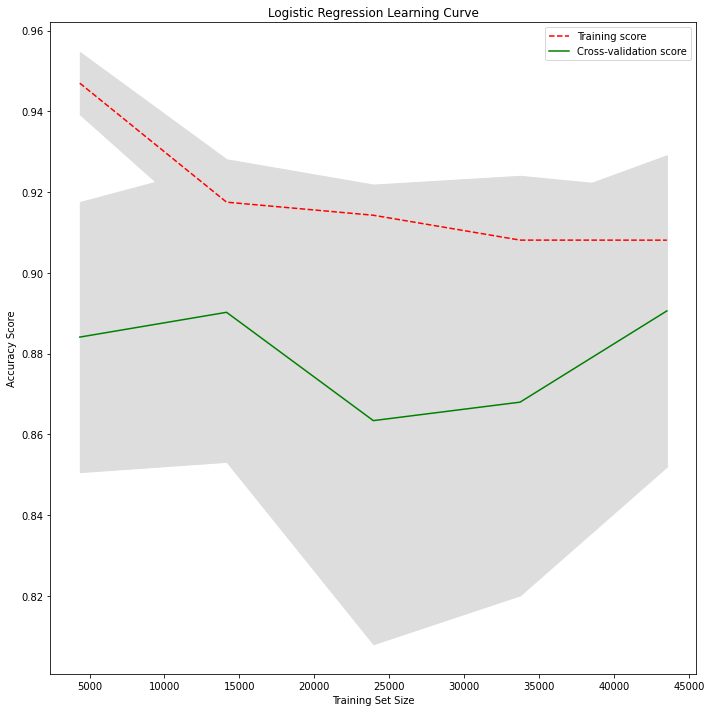

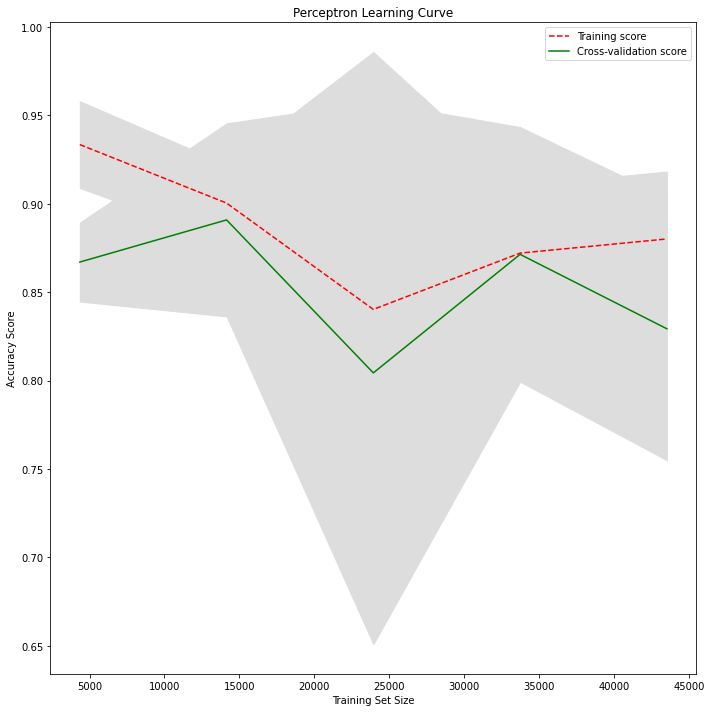

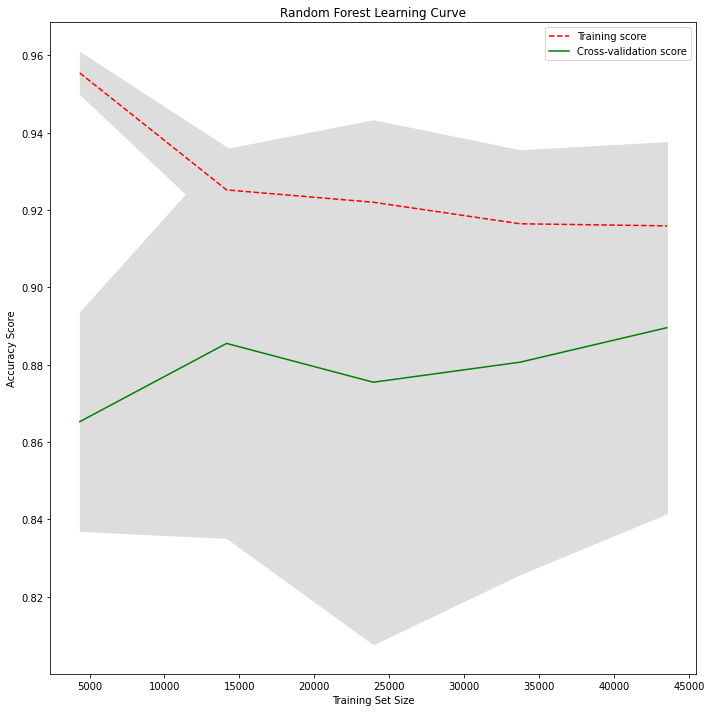

In [ ]:
# Show plots of how these models performed during training.
#  For example, plot train loss and train accuracy (or other evaluation metric) on the y-axis,
#  with number of iterations or number of examples on the x-axis.

def plot_training_curve(model_type, name):
  train_sizes, train_scores, test_scores = learning_curve(model_type, X, y, cv=5)
  train_mean = np.mean(train_scores, axis=1)
  train_std = np.std(train_scores, axis=1)

  test_mean = np.mean(test_scores, axis=1)
  test_std = np.std(test_scores, axis=1)
  plt.subplots(1, figsize=(10,10))
  plt.plot(train_sizes, train_mean, '--', color="r",  label="Training score")
  plt.plot(train_sizes, test_mean, color="g", label="Cross-validation score")

  plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, color="#DDDDDD")
  plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, color="#DDDDDD")

  plt.title(name + " Learning Curve")
  plt.xlabel("Training Set Size"), plt.ylabel("Accuracy Score"), plt.legend(loc="best")
  plt.tight_layout()
  plt.show()


plot_training_curve(LogisticRegression(), "Logistic Regression")
plot_training_curve(Perceptron(), "Perceptron")
plot_training_curve(RandomForestClassifier(), "Random Forest")

In [ ]:
# Tune Hyperparams
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

gsc = GridSearchCV(
        estimator=RandomForestClassifier(),
        param_grid={
            'n_estimators': [1, 5, 10, 20, 40, 60, 80, 100],
            'max_depth': [1, 2, 4, 5, 10, 50, None]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(Xval, yval)
best_params = grid_result.best_params_
print(best_params)

gsc = GridSearchCV(
        estimator=Perceptron(),
        param_grid={
            'alpha': [0.00001, 0.0001, 0.001, 0.01],
            'max_iter': [600, 800, 1000, 1200, 1400]
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(Xval, yval)
best_params = grid_result.best_params_
print(best_params)

gsc = GridSearchCV(
        estimator=LogisticRegression(),
        param_grid={
            'C': [0.8, 0.9, 1.0, 1.1, 1.2],
            'penalty': ['l1', 'l2', 'none']
        },
        cv=5, scoring='neg_mean_squared_error', verbose=0, n_jobs=-1)
grid_result = gsc.fit(Xval, yval)
best_params = grid_result.best_params_
print(best_params)

{'max_depth': 5, 'n_estimators': 100}
{'alpha': 1e-05, 'max_iter': 600}
{'C': 0.8, 'penalty': 'l2'}


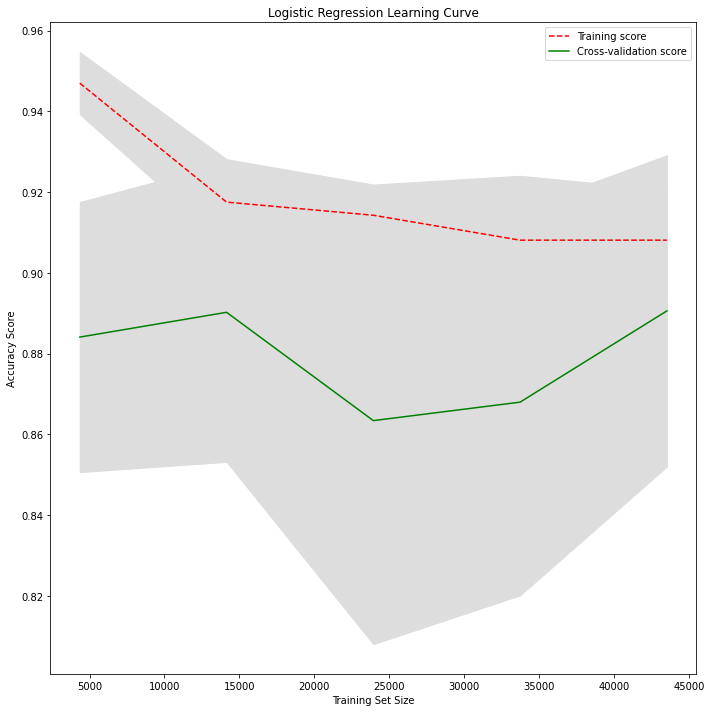

Logistic Regression: 
Accuracy: 0.9039786823486171
F1 Score: 0.9046271789723463
Precision: 0.8872180451127819
Recall: 0.9227331967976168



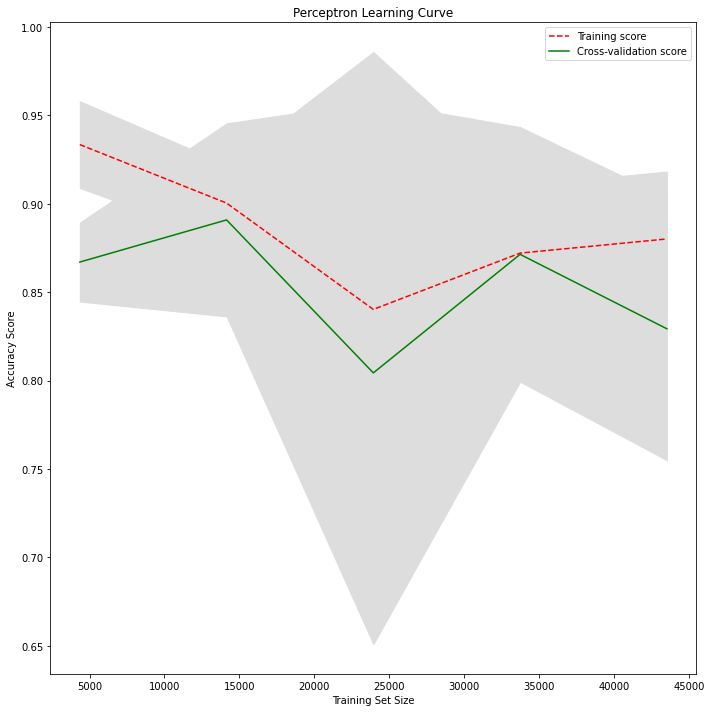

Perceptron: 
Accuracy: 0.8946981530827897
F1 Score: 0.9003131524008352
Precision: 0.8448979591836735
Recall: 0.9635077266803203



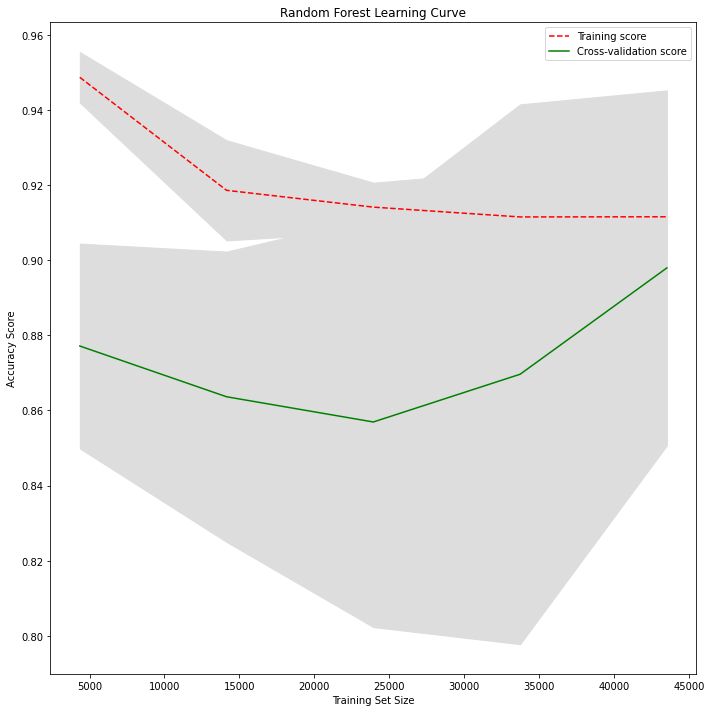

Random Forest: 
Accuracy: 0.9072865937701001
F1 Score: 0.9082810653576947
Precision: 0.8873889875666074
Recall: 0.9301805995159188


In [ ]:
# Use new hyperparams in models
plot_training_curve(LogisticRegression(C=0.8), "Logistic Regression")
print("Logistic Regression: ")
logisticModel = LogisticRegression(C=0.8).fit(Xtrain,ytrain)
y_pred = logisticModel.predict(Xtest)
accuracy = logisticModel.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))

print()

plot_training_curve(Perceptron(alpha=0.00001, max_iter=600), "Perceptron")
print("Perceptron: ")
perceptron = Perceptron(alpha=0.00001, max_iter=600).fit(Xtrain,ytrain)
y_pred = perceptron.predict(Xtest)
accuracy = perceptron.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))

print()

plot_training_curve(RandomForestClassifier(max_depth=5, n_estimators=100), "Random Forest")
print("Random Forest: ")
randomForest = RandomForestClassifier(max_depth=5, n_estimators=100).fit(Xtrain,ytrain)
y_pred = randomForest.predict(Xtest)
accuracy = randomForest.score(Xtest, ytest)
print("Accuracy: " + str(accuracy))
F1 = sklearn.metrics.f1_score(ytest,y_pred)
print("F1 Score: " + str(F1))
precision = sklearn.metrics.precision_score(ytest,y_pred)
print("Precision: " + str(precision))
recall = sklearn.metrics.recall_score(ytest, y_pred)
print("Recall: " + str(recall))

## Results

Show tables comparing your methods to the baselines.

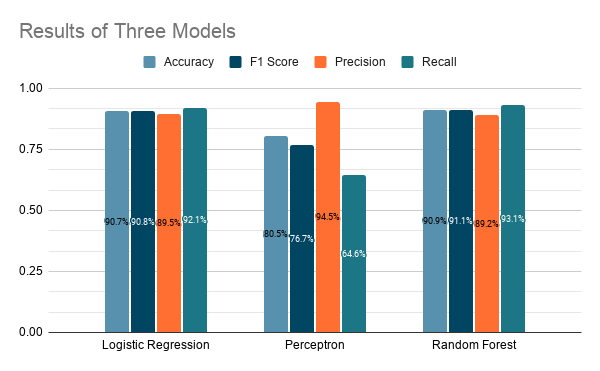

What about these results surprised you? Why?

Overall, the results were somewhat similar to what we expected. One difference that we did find was that Logistic Regression had almost the same F1-Score and accuracy as Random Forest, even though Random Forest has a broader nonlinear hypothesis class. In addition, we were frankly surprised that the linear perceptron performed as well as it did. While it was worse than the other two methods, we expected worse. This also suggests that the problem can be approximated using a linear function. 

Did your models over- or under-fit? How can you tell? What did you do to address these issues?

Overall, based on our learning curves for logistic regression and random forest, we do not think the models significantly overfit or underfit. However, we do believe that the perceptron may have underfit somewhat. We believe this because of a difference between precision and recall, which shows that the perceptron was biased towards one of the labels. 

What does the evaluation of your trained models tell you about your data? How do you expect these models might behave differently on different data?  

Overall, the evaluation of the trained models shows that the data might be best approximated using a linear method, since the random forest classifier had a similar performance to logistic regression even though it has a broader hypothesis class. I would expect our model to perform relatively well on other complete data. One problem we found with many datasets was the sparsity, which would significantly affect our model's ability to predict. With a limited number of features, each feature is quite significant, and the loss of any feature in a future example would significantly hinder our models. 

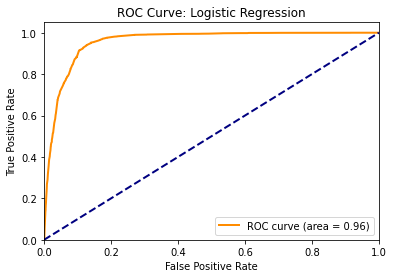

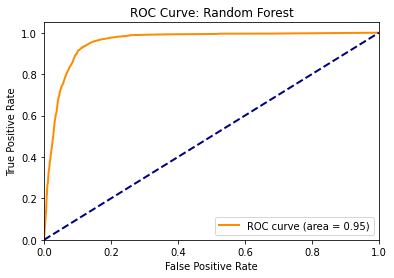

In [ ]:
# Show plots or visualizations of your evaluation metric(s) on the train and test sets.
#   What do these plots show about over- or under-fitting?
#   You may borrow from how we visualized results in the Lab homeworks.
#   Are there aspects of your results that are difficult to visualize? Why?

from sklearn import metrics

def plot_roc_curve(model, name):
  probas_ = model.predict_proba(Xtest)

  # Compute ROC curve and area the curve
  fpr, tpr, thresholds = metrics.roc_curve(ytest, probas_[:, 1])
  roc_auc = metrics.auc(fpr, tpr)

  #Plot the ROC Curve and include AUC in figure. 
  plt.figure()
  lw = 2
  plt.plot(fpr, tpr, color='darkorange',
          lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
  plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
  plt.xlim([0.0, 1.0])
  plt.ylim([0.0, 1.05])
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive Rate')
  plt.title("ROC Curve: " + name)
  plt.legend(loc="lower right")
  plt.show()

plot_roc_curve(logisticModel, "Logistic Regression")
#Since Perceptron does not output probabilities, we cannot analyze the ROC Curve of the Perceptron
plot_roc_curve(randomForest, "Random Forest")

# Discussion

## What you've learned

**What concepts from lecture/breakout were most relevant to your project? How so?**

From a techical standpoint, the models that were most relevant to our project were the logisitic, Perceptron, and the Random Forest Algorithms. We picked these three models for performance evaluation as we thought that they offered unique approaches of modeling the data. From working with cleaning the different features of the dataset, we recognized the ethical tradeoffs of utilizing certain demographic features. We also use different dataset cleaning techniques to preprocess the data before running the models on it. 

**What aspects of your project did you find most surprising?**

We found it surprising how much the performance of the models improved as we increased the amount of the data preprocessing. The largest improvements we saw were when we balanced our dataset to include an equal number of death and no-death patients and also when we removed all patients with missing data in any of the feature columns. We were also quite surprised with the overall high performance of our models. 

**What lessons did you take from this project that you want to remember for the next ML project you work on? Do you think those lessons would transfer to other datasets and/or models? Why or why not?**

Firstly, we learned that we need to spend time preprocessing the dataset so that we can achieve optimal results faster. We would make sure to balance our dataset and remove sparse data rows. On the next project, we'd also definately use feature selection techniques should we have a large number of features. Overall, these techniques should transfer between datasets as the principles are quite broad and can be applied in multiple cases. More scattered data could require more data preprocessing. 

**What was the most helpful feedback you received during your presentation? Why?**

The most helpful feedback that we received from our presentation was that we should determine which predictors were the most relevant to the predicted outcome of death or no-death. We agreed with this feedback as finding such patterns could be a good way of displaying trends from the dataset that could lead to more hypotheses. Certain features that were of more significance could be possible causes or correlations to the death of a patient. 

**If you had two more weeks to work on this project, what would you do next? Why?**

If we had two more weeks to work on this project, than we would delve deeper into the dataset that we got approval for a couple days ago which had 37 features that we could work with. These additional features could lead to better performance for our models, although they would require a lot more time for preprocessing. However, we would be able to do more rigourous feature selection because we don't have only 8 features. 

# References

An, Chansik, et al. “Machine Learning Prediction for Mortality of Patients Diagnosed with COVID-19: a Nationwide Korean Cohort Study.” Nature News, Nature Publishing Group, 30 Oct. 2020, www.nature.com/articles/s41598-020-75767-2.

CDC Case Surveillance Task Force. “COVID-19 Case Surveillance Public Use Data.” Centers for Disease Control and Prevention, 8 Dec. 2020, data.cdc.gov/Case-Surveillance/COVID-19-Case-Surveillance-Public-Use-Data/vbim-akqf.

“COVID-19 Map.” Johns Hopkins Coronavirus Resource Center, Johns Hopkins University & Medicine, 2020, coronavirus.jhu.edu/map.html.